In [14]:
import numpy
import math 
from matplotlib import pyplot


import vortex
%matplotlib inline

In [60]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)


In [61]:
gamma = 5.0

a = numpy.linspace(x_start, x_end, num=11, endpoint=True, retstep=False, dtype=None)
print(a)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]


In [62]:


# compute all values in the data txt file using a for loop
for i in range(len(a)):  # len will know the length of your 1-D array
    x_source = a[i]   # location of the x source
 
    y_source = 0.0   # location of the y source              
 
    strength_source = gamma        # strength source 

#print('u=',x_source)
# compute the velocity field
    u_vortex, v_vortex = vortex.get_velocity_vortex(gamma, x_source, y_source, X, Y)

# compute the stream function
    psi_vortex = vortex.get_stream_function_vortex(gamma, x_source, y_source, X, Y)

#superposition of the source on the freestream
    u += u_vortex         # += Will increment u_freestream and u_source in a way where u_source is not overwritten 
    v += v_vortex        # += Will increment v_freestream and v_source in a way where u_source is not overwritten 
    psi += psi_vortex     # += Will increment psi_freestream and psi_source in a way where u_source is not overwritten 



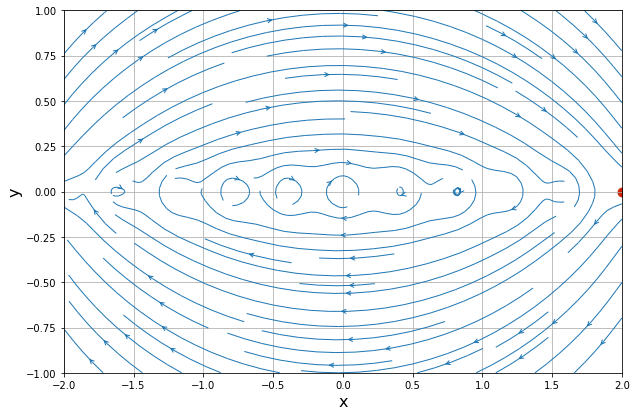

In [65]:
#plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - y_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o');

In [79]:
u_analytical_vortex = (gamma/(2*a))*((numpy.sinh((2*numpy.pi*Y)/a))/(numpy.cosh((2*numpy.pi*Y)/a) - numpy.cos((2*numpy.pi*X)/a)))
v_analytical_vortex = -(gamma/(2*a))*((numpy.sin((2*numpy.pi*X)/a))/(numpy.cosh((2*numpy.pi*Y)/a) - numpy.cos((2*numpy.pi*X)/a)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (50,50) (11,) 